## 4 Statistical Analysis

In [1]:
data <- read.csv('Cleaned_Data/london_weekday_cleaned_final.csv')

In [2]:
str(data)

'data.frame':	2481 obs. of  20 variables:
 $ X                         : int  1 2 3 4 5 6 7 8 12 13 ...
 $ realSum                   : num  298 337 227 256 240 ...
 $ room_type                 : Factor w/ 2 levels "Private room",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ room_shared               : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ room_private              : Factor w/ 2 levels "False","True": 2 2 2 2 2 2 2 2 2 2 ...
 $ person_capacity           : int  2 2 2 3 2 2 2 4 2 2 ...
 $ host_is_superhost         : Factor w/ 2 levels "False","True": 2 1 2 1 1 1 1 1 1 2 ...
 $ multi                     : int  1 1 1 0 0 0 1 1 0 1 ...
 $ biz                       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cleanliness_rating        : int  10 10 10 9 10 10 10 9 4 9 ...
 $ guest_satisfaction_overall: int  99 96 99 98 100 100 95 93 80 97 ...
 $ bedrooms                  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dist                      : num  2.2 2.32 5.71 3.26 5.09 ...
 $ metro_dist                : 

In [3]:
keep <- c("realSum", "rest_index_norm","attr_index_norm", "dist", "metro_dist")
london_weekday = data[,(names(data) %in% keep)]

In [4]:
london_weekday$logPrice <- log(london_weekday$realSum)
london_weekday$logMetroDist <- log(london_weekday$metro_dist)
keep <- c("logPrice", "attr_index_norm","rest_index_norm", "logMetroDist", "dist")
london_weekday = london_weekday[,(names(london_weekday) %in% keep)]
head(london_weekday)

dist,attr_index_norm,rest_index_norm,logPrice,logMetroDist
2.198946,38.50163,17.215961,5.697041,-0.9695280
2.322958,29.77076,17.172462,5.819461,-0.7914712
5.707825,13.60296,8.097600,5.423725,0.5446339
3.257945,22.90232,13.166649,5.546567,-0.1918663
5.085730,15.75990,8.715433,5.480192,0.5912352
4.595055,19.70241,12.215122,5.781023,-1.2144317


### 4.1 Correlations between log(salary) and other continuous variables

In [5]:
library(corrplot)

corrplot 0.92 loaded


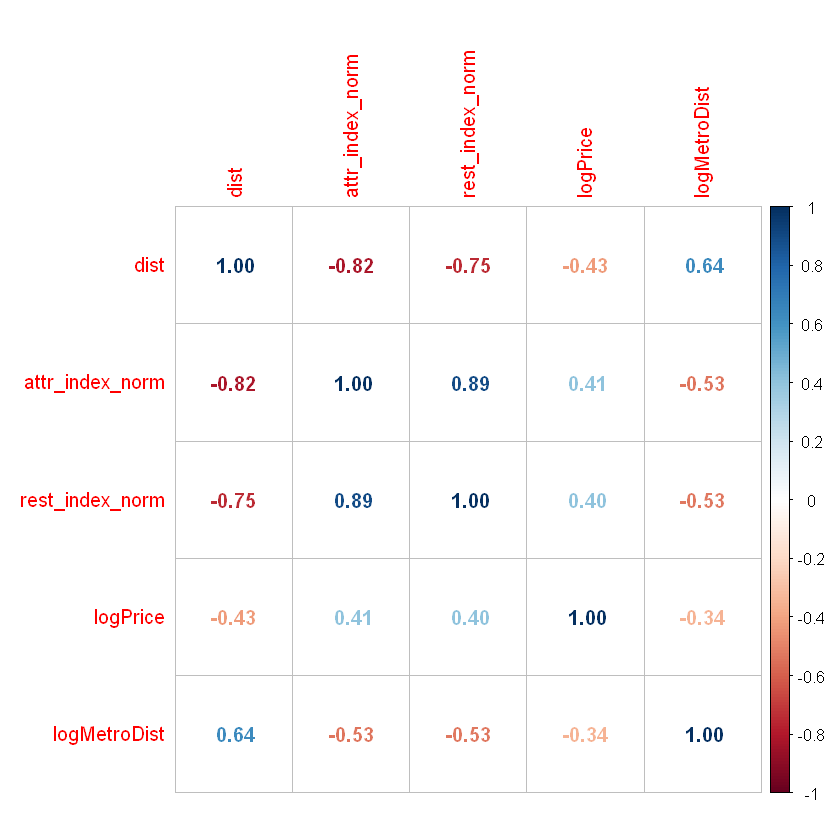

In [6]:
corrplot(cor(london_weekday), method="number")

In [7]:
my_cols <- c("#00AFBB", "#E7B800", "#FC4E07")

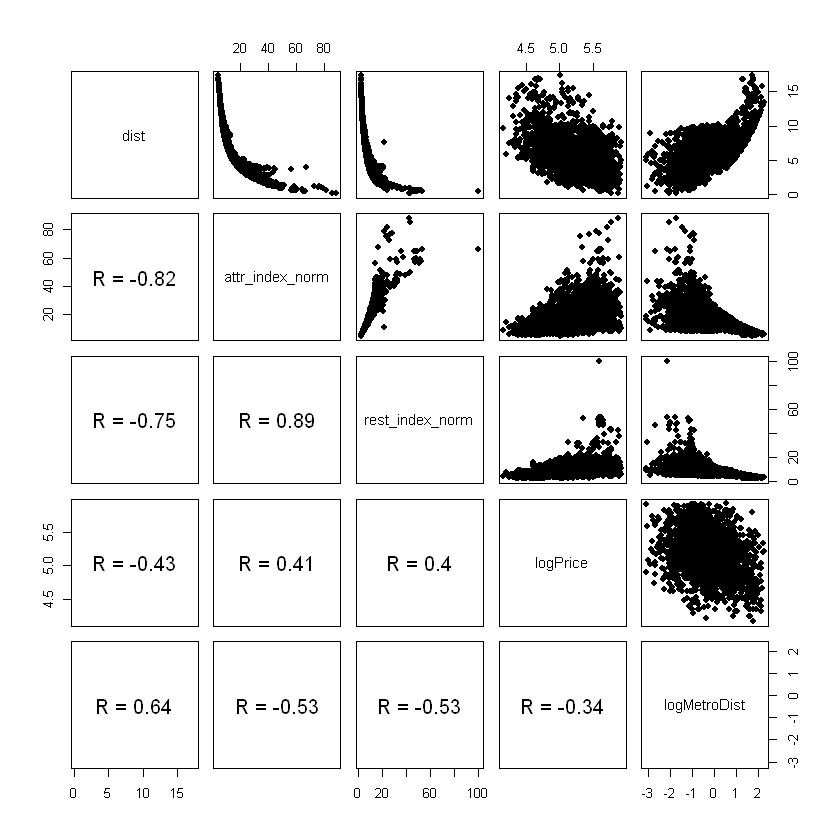

In [8]:
# Correlation panel
panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cor(x, y), digits=2)
    txt <- paste0("R = ", r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = 1.5)
}
# Customize upper panel
upper.panel<-function(x, y){
  points(x,y, pch = 19)
}
# Create the plots
pairs(london_weekday[,1:5], 
      lower.panel = panel.cor,
      upper.panel = upper.panel)